<a id='home'></a>
# Project 4: Data Analysis & Insights

In [1]:
# import relevant libraries into Jupyter Notebooks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

#### <font color = 'blue'> High Level Analysis 


In [2]:
# creates new df
df_twitter_archive_MASTER_v3 = pd.read_csv('UD-P4_df_twitter_archive_MASTER_v3.csv')

In [3]:
df_twitter_archive_MASTER_v3.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,8.924210e+17,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Bagel,0.085851,False,Banana,0.076110,False,7550,35698,NaN
1,8.921770e+17,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,5595,30873,NaN
2,8.918150e+17,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,3705,23207,NaN
3,8.916900e+17,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,7730,38991,NaN
4,8.913280e+17,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8331,37254,NaN


In [4]:
# High level stats
df_twitter_archive_MASTER_v3[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,2361.000000,2361.000000,2361.000000
mean,12.213469,3445.883100,10795.978823
std,38.206954,5860.406666,15170.381590
min,0.000000,11.000000,70.000000
25%,10.000000,622.000000,2097.000000
50%,11.000000,1581.000000,5066.000000
75%,12.000000,3927.000000,14424.000000
max,1776.000000,76267.000000,153914.000000


Insight 1 - Top 3 Most Popular Dogs by Favourite Count

In [5]:
# Top 5 most favourited dog
df_twitter_archive_MASTER_v3.sort_values(['favorite_count'], ascending =False ).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1173,7.442350e+17,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,True,Ice Bear,0.044681,False,Whippet,0.018442,True,76267,153914,doggo
413,8.228730e+17,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True,42968,131303,puppo
253,8.071070e+17,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,...,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,55592,118844,NaN


In [6]:
# returns No 1 most favourited dog
df_twitter_archive_MASTER_v3[df_twitter_archive_MASTER_v3['tweet_id']==7.442350e+17].jpg_url

1173    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg

In [7]:
# returns No 2 most favourited dog
df_twitter_archive_MASTER_v3[df_twitter_archive_MASTER_v3['tweet_id']==8.228730e+17].jpg_url

413    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg

In [8]:
# returns No 3 most favourited dog
df_twitter_archive_MASTER_v3[df_twitter_archive_MASTER_v3['tweet_id']==8.071070e+17].jpg_url

251    https://pbs.twimg.com/ext_tw_video_thumb/80710...
252    https://pbs.twimg.com/ext_tw_video_thumb/80710...
253    https://pbs.twimg.com/ext_tw_video_thumb/80710...
254    https://pbs.twimg.com/ext_tw_video_thumb/80710...
Name: jpg_url, dtype: object

https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg

***Comment:***
[Text here]


Insight 2: Retweet Counts vs Favourite Counts¶


C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(63.0, 0.5, 'Favorite Counts')

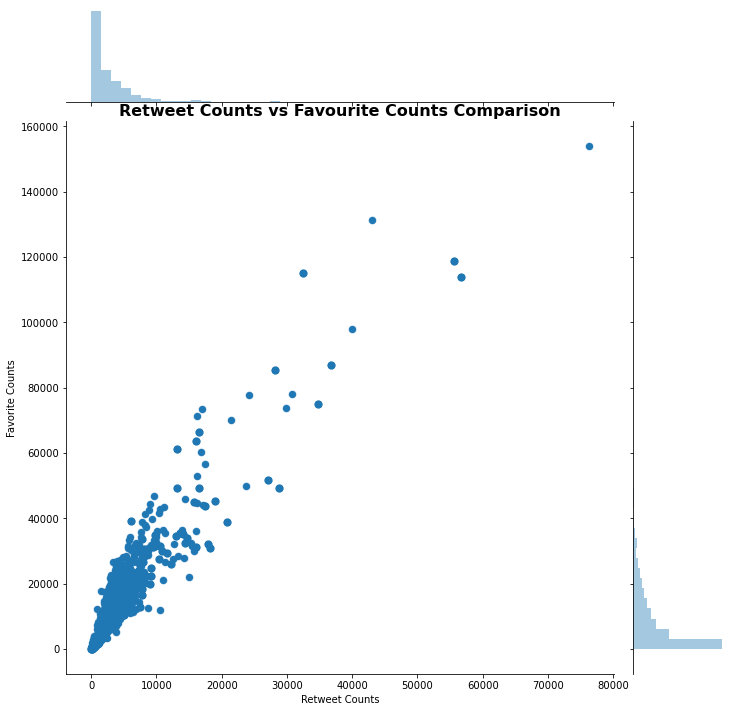

In [9]:
# returns visualisation of comparison between favourite & retweet counts

scp = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_twitter_archive_MASTER_v3, 
                  size=10)
scp.plot_joint(plt.scatter,  
             linewidth=2, 
             alpha=0.45)

plt.title('Retweet Counts vs Favourite Counts Comparison', weight='bold').set_fontsize('16')
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')


Text(63.0, 0.5, 'Retweet Counts')

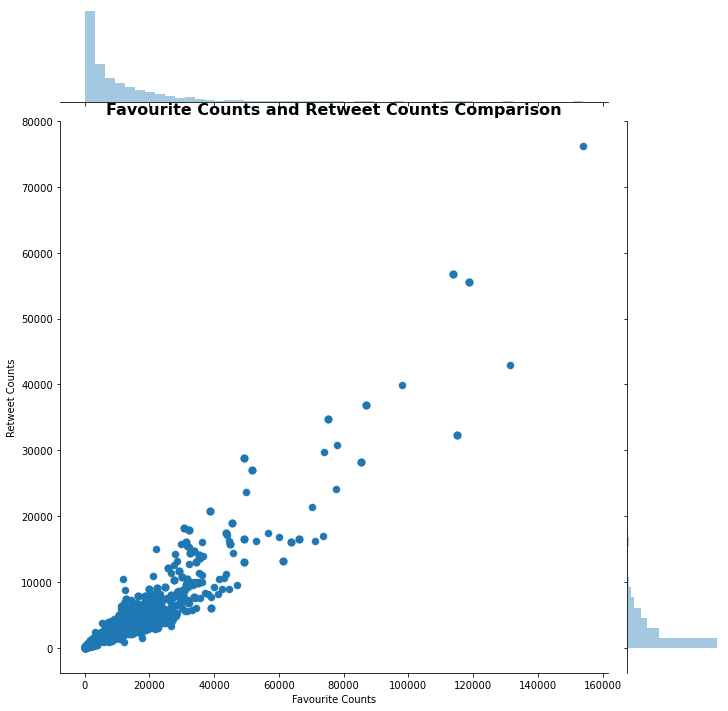

In [10]:
# returns visualisation of comparison between favourite & retweet counts (version 2 other way round, Favourite vs Retweet)

scp = sns.jointplot(x='favorite_count', 
                  y='retweet_count', 
                  data=df_twitter_archive_MASTER_v3, 
                  size=10)
scp.plot_joint(plt.scatter,  
             linewidth=2, 
             alpha=0.45)

plt.title('Favourite Counts and Retweet Counts Comparison', weight='bold').set_fontsize('16')
plt.xlabel('Favourite Counts')
plt.ylabel('Retweet Counts')


Insight 3: Dog breed and stage counts


In [11]:
df_twitter_archive_MASTER_v3.p1.value_counts()[:30] 

Golden Retriever             194
Labrador Retriever           116
Pembroke                     100
Chihuahua                     90
Pug                           60
Chow                          53
Samoyed                       52
Toy Poodle                    48
Pomeranian                    47
Cocker Spaniel                39
French Bulldog                39
Malamute                      31
Chesapeake Bay Retriever      26
Miniature Pinscher            25
Cardigan                      25
Seat Belt                     24
Eskimo Dog                    22
Siberian Husky                20
Staffordshire Bullterrier     20
Shih-Tzu                      20
German Shepherd               20
Beagle                        20
Lakeland Terrier              19
Kuvasz                        18
Web Site                      18
Teddy                         18
Maltese Dog                   18
Shetland Sheepdog             18
Great Pyrenees                17
Rottweiler                    17
Name: p1, 

***Comments:***
dfd

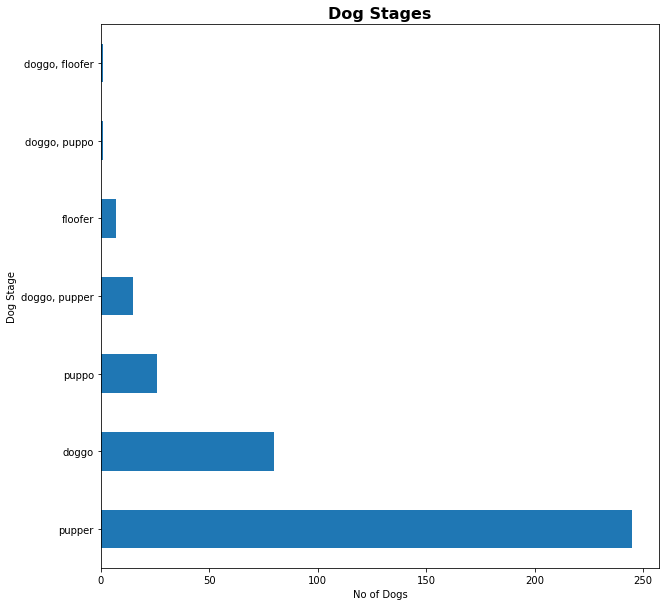

In [12]:
# make a Pie chart for dog stage counts
df_twitter_archive_MASTER_v3['dog_stage'].value_counts().plot(kind='barh', figsize=(10,10))
plt.ylabel('Dog Stage')
plt.xlabel('No of Dogs')
plt.title('Dog Stages', weight='bold', fontsize=16);

Text(0.5, 1.0, 'Top 10 Dog Predictions')

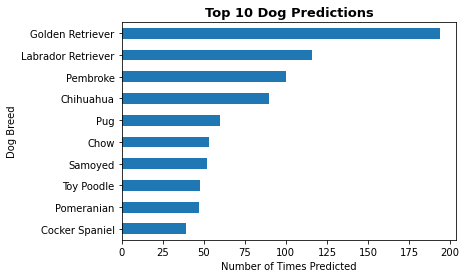

In [13]:
# Make a bar plot for top 10 dog breeds
df_twitter_archive_MASTER_v3['p1'].value_counts()[9::-1].plot(kind='barh')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.title('Top 10 Dog Predictions', weight='bold', fontsize=13)

Text(0.5, 1.0, 'Most Highly Rated Dog Breeds')

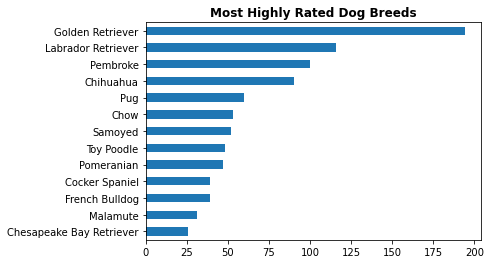

In [14]:
# returns the most common dog breeds in bar chart
only_dogs = df_twitter_archive_MASTER_v3['p1'] != 'not_dog'
df_twitter_archive_MASTER_v3[only_dogs].p1.value_counts()[12::-1].plot(kind='barh')
plt.title('Most Highly Rated Dog Breeds', weight='bold', fontsize=12)

<ul>
<li><a href="#home"> ...END...  go to beginning </a></li>
</ul>    